Instructions for updating:
non-resource variables are not supported in the long term
[[0.4924006  0.5075994 ]
 [0.49320042 0.5067996 ]]
Training step: 0000 cost= 14.957809448
[[0.24217847 0.7578215 ]
 [0.26425254 0.73574746]]
Training step: 0050 cost= 13.785465240
[[0.1501252  0.84987485]
 [0.1737147  0.8262853 ]]
Training step: 0100 cost= 13.452857971
[[0.10764141 0.8923586 ]
 [0.12949844 0.8705015 ]]
Training step: 0150 cost= 13.315710068
[[0.0836454  0.9163546 ]
 [0.10351706 0.89648294]]
Training step: 0200 cost= 13.242458344
[[0.06829716 0.93170285]
 [0.08640192 0.91359806]]
Training step: 0250 cost= 13.197063446
[[0.05765186 0.9423482 ]
 [0.0742523  0.9257477 ]]
Training step: 0300 cost= 13.166178703
[[0.04984025 0.9501598 ]
 [0.06516549 0.9348345 ]]
Training step: 0350 cost= 13.143792152
[[0.04386586 0.9561341 ]
 [0.05810325 0.9418968 ]]
Training step: 0400 cost= 13.126806259
[[0.03915    0.96085006]
 [0.05245085 0.94754916]]
Training step: 0450 cost= 13.113468170
[[0.03533364 0.

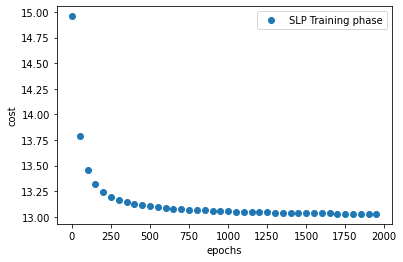

In [2]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
learning_rate = 0.0008
training_epochs = 2000
display_step = 50
# taking input as array from numpy package and converting it into tensor
inputX = np.array([[  2,   3],
                  [  1,   3]])
inputY = np.array([[  2,   3],
                  [  1,   3]])
x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable([[0.0,0.0],[0.0,0.0]])
b = tf.Variable([0.0,0.0])

layer1 = tf.add(tf.matmul(x, W), b)
y = tf.nn.softmax(layer1)

cost = tf.reduce_sum(tf.pow(y_-y,2))

optimizer =tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

avg_set = []
epoch_set = []

for i in range(training_epochs):
   sess.run(optimizer, feed_dict = {x: inputX, y_:inputY})

   #log training
   if i % display_step == 0:
       cc = sess.run(cost, feed_dict = {x: inputX, y_:inputY})
       #check what it thinks when you give it the input data
       print(sess.run(y, feed_dict = {x:inputX}))


       print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc))
       avg_set.append(cc)
       epoch_set.append(i + 1)

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict = {x: inputX, y_: inputY})
print("Training cost = ", training_cost, "\nW=", sess.run(W),
      "\nb=", sess.run(b))
plt.plot(epoch_set,avg_set,'o',label = 'SLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()